In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [27]:
def graph_plt(x_axis,results):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax[0].plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax[0].legend(['train', 'val'], loc='best')
    #plt[0].ylabel('Log Loss')
    #plt[0].title('XGBoost Log Loss')
    ax[0].set_ylabel('Log Loss')
    ax[0].set_xlabel('Epoch')
    #plt.show()
    # plot classification error
    #fig, ax = plt.subplots()
    ax[1].plot(x_axis, results['validation_0']['merror'], label='Train')
    ax[1].plot(x_axis, results['validation_1']['merror'], label='Test')
    ax[1].legend(['train', 'val'], loc='best')
    ax[1].set_ylabel('Classification Error')
    ax[1].set_xlabel('Epoch')
    fig.savefig('xgboost-model-score.png')
    plt.show()

In [4]:
dataset = pd.read_csv('nyc_for_ann.csv')
X = dataset.drop(columns=['PUT','DOT','zone'],axis=1)
y = dataset['zone']
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
del dataset
del data_dmatrix

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370985 entries, 1631717 to 773630
Data columns (total 20 columns):
VendorID                 1370985 non-null int64
RatecodeID               1370985 non-null int64
DOLocationID             1370985 non-null int64
passenger_count          1370985 non-null int64
trip_distance            1370985 non-null float64
fare_amount              1370985 non-null float64
extra                    1370985 non-null float64
mta_tax                  1370985 non-null float64
tip_amount               1370985 non-null float64
tolls_amount             1370985 non-null float64
improvement_surcharge    1370985 non-null float64
total_amount             1370985 non-null float64
payment_type             1370985 non-null int64
trip_type                1370985 non-null float64
dispatch                 1370985 non-null int64
PickUp_hr                1370985 non-null int64
TMAX                     1370985 non-null int64
day                      1370985 non-null int64


In [7]:
clf = xgb.XGBClassifier(max_depth=5,
                           min_child_weight=1,
                           learning_rate=0.001,
                           n_estimators=100,
                           nthread=2,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)


In [8]:
del X
del y


In [9]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [10]:
clf.fit(X_train, y_train, eval_metric=['merror','mlogloss'], verbose=True,eval_set=eval_set, early_stopping_rounds=30)

[0]	validation_0-merror:0.659857	validation_0-mlogloss:3.21651	validation_1-merror:0.661222	validation_1-mlogloss:3.21652
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 30 rounds.
[1]	validation_0-merror:0.659854	validation_0-mlogloss:3.21416	validation_1-merror:0.66129	validation_1-mlogloss:3.21418
[2]	validation_0-merror:0.660054	validation_0-mlogloss:3.21182	validation_1-merror:0.661462	validation_1-mlogloss:3.21185
[3]	validation_0-merror:0.659372	validation_0-mlogloss:3.2095	validation_1-merror:0.660796	validation_1-mlogloss:3.20954
[4]	validation_0-merror:0.659381	validation_0-mlogloss:3.2072	validation_1-merror:0.660791	validation_1-mlogloss:3.20724
[5]	validation_0-merror:0.659188	validation_0-mlogloss:3.20491	validation_1-merror:0.660572	validation_1-mlogloss:3.20496
[6]	validation_0-merror:0.659189	validation_0-mlogloss:3.20264	validation_1-merror:0.660569	validation_1

[66]	validation_0-merror:0.654297	validation_0-mlogloss:3.08621	validation_1-merror:0.655804	validation_1-mlogloss:3.08668
[67]	validation_0-merror:0.654351	validation_0-mlogloss:3.08456	validation_1-merror:0.655828	validation_1-mlogloss:3.08503
[68]	validation_0-merror:0.654317	validation_0-mlogloss:3.08291	validation_1-merror:0.65579	validation_1-mlogloss:3.08338
[69]	validation_0-merror:0.6543	validation_0-mlogloss:3.08127	validation_1-merror:0.655825	validation_1-mlogloss:3.08175
[70]	validation_0-merror:0.654285	validation_0-mlogloss:3.07964	validation_1-merror:0.655851	validation_1-mlogloss:3.08012
[71]	validation_0-merror:0.654427	validation_0-mlogloss:3.078	validation_1-merror:0.656114	validation_1-mlogloss:3.07849
[72]	validation_0-merror:0.654263	validation_0-mlogloss:3.07638	validation_1-merror:0.655851	validation_1-mlogloss:3.07688
[73]	validation_0-merror:0.654205	validation_0-mlogloss:3.07476	validation_1-merror:0.655784	validation_1-mlogloss:3.07526
[74]	validation_0-mer

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=2, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)

In [11]:
y_pre = clf.predict(X_test)

In [12]:
predictions = [round(value) for value in y_pre]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 34.60%


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pre))
print("RMSE: %f" % (rmse))

RMSE: 82.783871


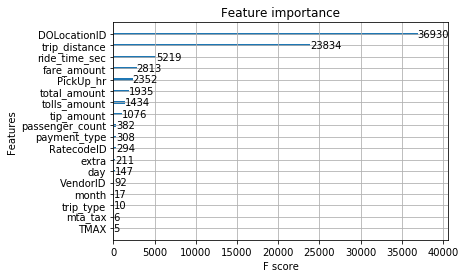

In [14]:
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [18]:
results = clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

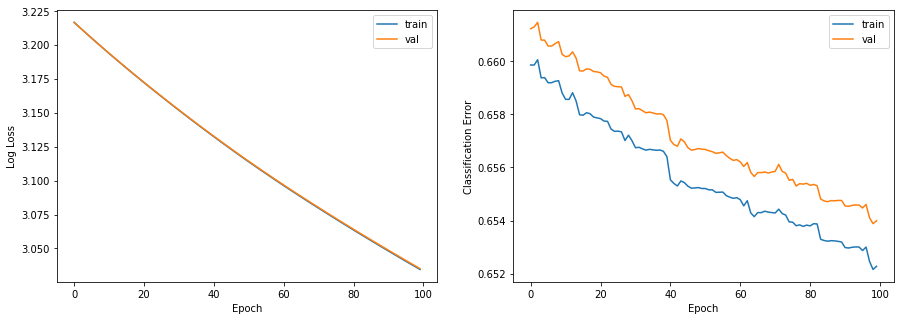

In [28]:
graph_plt(x_axis,results)
